## 피벗테이블

피벗테이블(pivot table)은 입력값으로 간단한 열 단위의 데이터를 취하고 그 데이터에 대한 다차원 요약을 제공하는 테이블을 구성하는 방법이다.

In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


성별에 따른 평균 생존율을 구한다면?

In [4]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [5]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 피벗 테이블 구문

In [6]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 다단계 피벗 테이블

피벗 테이블의 그룹핑은 다단계로 여러 옵션을 통해 지정할 수 있다

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
import pandas as pd
age = pd.cut(titanic['age'],[0,18,80])

데이터를 값을 기준으로 구간을 생성

titanic['age'] 값이 0~18까지 18~80까지 
2개의 구간으로 나눈다.

In [9]:
titanic.pivot_table('survived', index=['sex', age], 
                    columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:
fare = pd.qcut(titanic['fare'],2,labels=['저가','고가'])
fare.head()

0    저가
1    고가
2    저가
3    고가
4    저가
Name: fare, dtype: category
Categories (2, object): [저가 < 고가]

In [11]:
pd.value_counts(fare)

저가    447
고가    444
Name: fare, dtype: int64

In [12]:
titanic.pivot_table('survived', index=['sex', age],
                   columns=[fare, 'class'])

fare               저가                            고가                    
class           First    Second     Third     First    Second     Third
sex    age                                                             
female (0, 18]    NaN  1.000000  0.714286  0.909091  1.000000  0.318182
       (18, 80]   NaN  0.880000  0.444444  0.972973  0.914286  0.391304
male   (0, 18]    NaN  0.000000  0.260870  0.800000  0.818182  0.178571
       (18, 80]   0.0  0.098039  0.125000  0.391304  0.030303  0.192308

### 기타 피벗 테이블 옵션 

피벗테이블의 옵션에서 aggfunc 키워드는 어떤 유형의 집계를 적용할지 제어한다(기본값 : 평균). 평균이외에 'count', 'min', 'max' 등을 활용가능하고 딕셔너리를 활용하여 열마다 다르게 집계 할 수도 있다.

In [13]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

##### Quiz)
타이타닉 데이터프레임을 활용하여, 성별을 기준으로 탑승자의 
평균 연령과 수를 구하세요



In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.pivot_table(index='sex',
                   aggfunc={'age':'mean', 'sex':'count'})

,age,sex
sex,,
female,27.915709,314
male,30.726645,577


In [16]:
pd.value_counts(titanic['sex'])

male      577
female    314
Name: sex, dtype: int64

In [17]:
titanic.groupby(['sex'])['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

margins 키워드를 통해 그룹별 총합을 계산할 수 있다.

In [18]:
titanic.pivot_table('survived', index='sex',
                   columns='class', margins=True,
                   margins_name="합계")

class,First,Second,Third,합계
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
합계,0.629630,0.472826,0.242363,0.383838


### 예제

In [19]:
births = pd.read_csv(r'c:\births.csv')

In [20]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [21]:
births['decade'] = (births['year'] // 10) * 10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [22]:
births.pivot_table('births', index='decade',
                  columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [23]:
import matplotlib.pyplot as plt

In [24]:
sns.set()

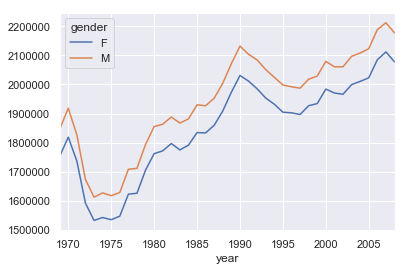

In [25]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

## MatPlotlib를 활용한 시각화

Matplotlib는 다중 플랫폼 데이터 시각화 라이브러리이다. 다양한 운영체제에서 동작할 수 있는 점이 가장 큰 장점으로 파이썬에서도 활용할 수 있다.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
x = np.linspace(0, 10, 5) # 0에서 10까지 5개의 숫자를 추린다.
x

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

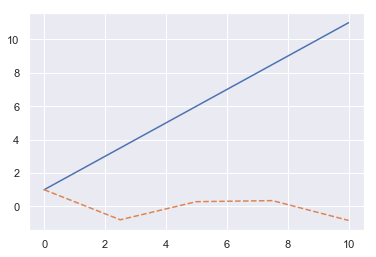

In [28]:
fig = plt.figure()
plt.plot(x, x+1, "-")
plt.plot(x, np.cos(x), '--')

##### 그림으로 저장하기

In [29]:
fig.savefig('myFigure.png')

##### 그림읽어오기

In [30]:
from IPython.display import Image

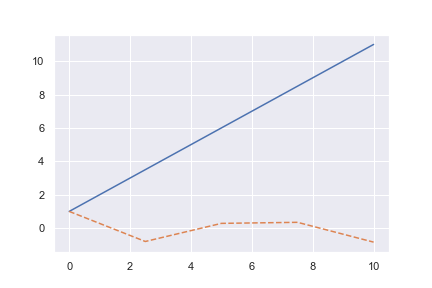

In [31]:
Image('./myFigure.png')

### 두가지 인터페이스

Matplotlib는 매트랩 스타일의 인터페이스와 객체지향 인터페이스 2가지를 지원한다.

#### 매트랩 인터페이스

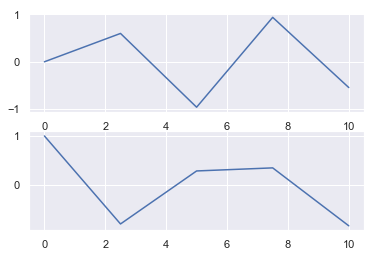

In [32]:
plt.figure() # 플롯 그림 생성

# 두개의 패널 중 첫 패널을 생성

plt.subplot(2, 1, 1) #(rows, columns, panel number)
plt.plot(x, np.sin(x))
# 두번째 패널 생성
plt.subplot(2, 1, 2) #(rows, columns, panel number)
plt.plot(x, np.cos(x))

### 객체지향 인터페이스

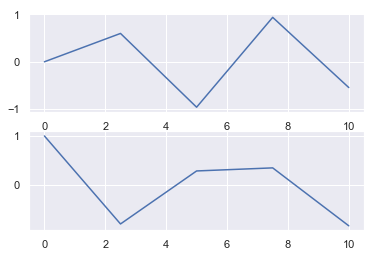

In [33]:
# 전체 플롯그리드(fig), 두 객체의 배열(ax) 생성
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

### 라인 플롯

모든 Matplotlib 플롯은 그림(figure)와 축(axes)를 만드는 것으로 시작

- 그림(figure) : 축, 그래픽, 텍스트, 레이블을 표시하는 하나의 컨테이너(ex) 그림이 그려지는 종이)
- 축(axes) : 하나의 플롯 그래프( 영어에서 축을 의미하는 axis의 복수가 axes, 철자에 주의하자)
- axis : x축, y축을 의미

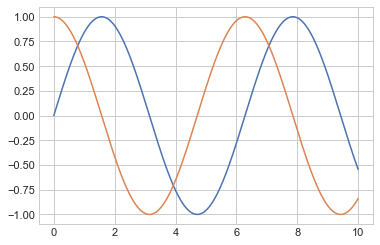

In [34]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10,1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

### 플롯 수정하기 : 선 색상과 스타일

플롯에서 선의 색상을 수정할 때 plt.plot() 함수의 color 키워드를 사용

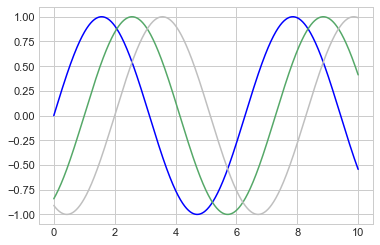

In [35]:
plt.plot(x, np.sin(x-0), color='blue') # 색이름
plt.plot(x, np.sin(x-1), color='g') # 색이름 축약(단일문자 표현)
plt.plot(x, np.sin(x-2), color='0.75') # 회색조(0~1)
#plt.plot(x, np.sin(x-3), color='#FFDD44') # RGB 코드(RRGGBB, 16진수)
#plt.plot(x, np.sin(x-4), color=(0,0,1))#RGBA 코드(0~1)


- RGBA 색상 예시

    (0,0,0) > 흰색
    (1,1,1) > 검정
    (1,0,0) > 빨강
    (1,0,0,1) > 빨강 (마지막 숫자는 투명도)

- 색상 볼수 있는 사이트 링크 : https://www.w3schools.com/colors/colors_names.asp

단일문자로 표현되는 색상은 RGB(Red, Green, Blue), CMYK(Cyan(청록), Magenta(자홍), Yellow, BlacK)의 약어이다.


linestyle 키워드를 활용하면 선 스타일을 선택할 수 있다.

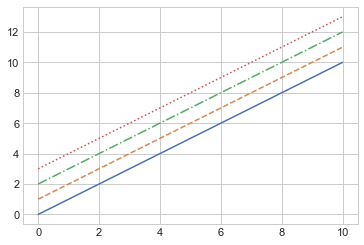

In [36]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

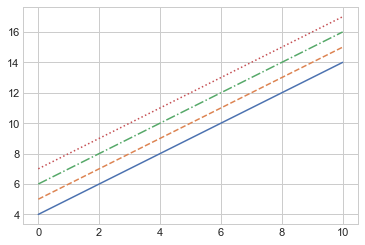

In [37]:
plt.plot(x, x+4, linestyle='-') #solid
plt.plot(x, x+5, linestyle='--') # dashed
plt.plot(x, x+6, linestyle='-.') #dashdot
plt.plot(x, x+7, linestyle=':') #dotted

linestyle과 color코드를 합쳐 표현할 수도 있다.

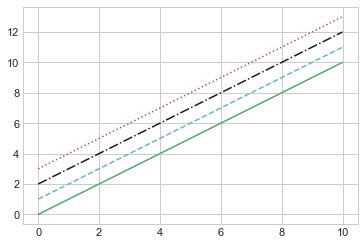

In [38]:
plt.plot(x, x+0, '-g')  # solid + green
plt.plot(x, x+1, '--c') # dashed + cyan
plt.plot(x, x+2, '-.k') # dashdot + black
plt.plot(x, x+3, ':r')  # dotted + red

단일문자로 표현되는 색상은 RGB(Red, Green, Blue), CMYK(Cyan(청록), Magenta(자홍), Yellow, BlacK)의 약어이다.

### 플롯 조정하기 : 축 경계


Matplotlib은 기본적으로 축 경계를 자동으로 설정한다. 축 경계를 조정하기 위해서는 plt.xlim(), plt.ylim() 매서드를 활용한다.

Matplotlib은 기본적으로 축 경계를 자동으로 설정한다. 축 경계를 조정하기 위해서는 plt.xlim(), plt.ylim() 매서드를 활용한다.

(-1.5, 1.5)

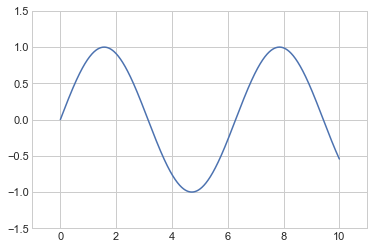

In [39]:

plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

(1.2, -1.2)

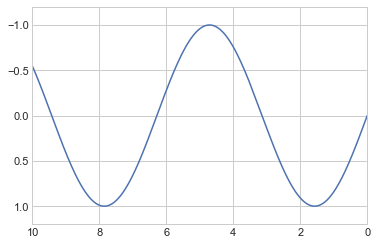

In [40]:
plt.plot(x, np.sin(x))
plt.xlim(10,0)
plt.ylim(1.2,-1.2)

plt.axis() 매서드는 [x축 최소값, x축 최대값, y축 최소값, y축 최대값]를 지정하는 리스트로 x, y축을 설정한다.

[-1, 11, -1.5, 1.5]

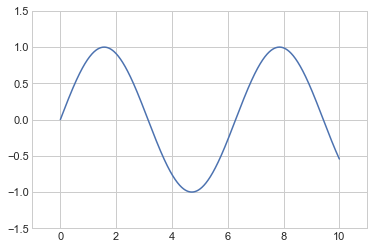

In [41]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5,1.5])

축에 대한 리스트 값 대신 plt.axis()의 매개변수로

'tight'를 주면 플롯 주변의 경계를 밀착시킬 수 있고,
'equal'을 지정하면 축의 단위를 똑같게 설정하여 보여준다.

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

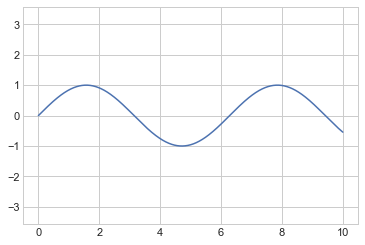

In [42]:
plt.plot(x, np.sin(x))
plt.axis('equal')

### 플롯에 레이블 붙이기

플롯에 제목, 축 레이블(축이름), 간단한 범례를 추가할 수 있다.

Text(0, 0.5, 'y=sin(x)')

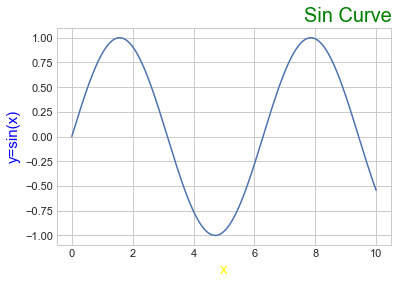

In [43]:
plt.plot(x, np.sin(x))
plt.title("Sin Curve", fontsize=20, color='green',
          loc='right') # loc=right | center | left
plt.xlabel("x", fontsize=15, color='yellow')
plt.ylabel("y=sin(x)", fontsize=15, color='blue')

범례를 만들려면 1) label 키워드를 사용해 각 라인의 레이블을 지정하고, 2) plt.legend() 메서드를 사용한다.



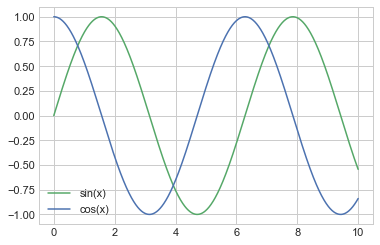

In [44]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '-b', label='cos(x)')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


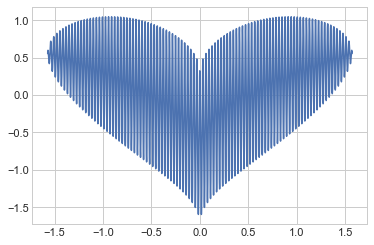

In [45]:
x = np.linspace(-2, 2, 100000)
y = lambda x: (np.sqrt(np.cos(x)) * np.cos(200 * x) + np.sqrt(abs(x)) - 0.7) * pow((4 - x * x), 0.01)
    
plt.plot(x, list(map(y,x)))


##### Quiz) 
다음 데이터로 그래프를 그리세요

Text(0, 0.5, 'RATE')

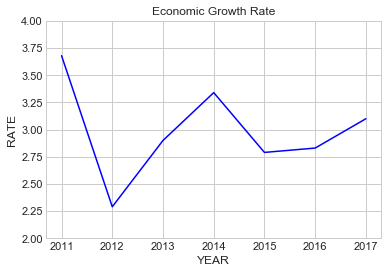

In [46]:
x = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [3.68, 2.29, 2.90, 3.34, 2.79, 2.83, 3.10]
plt.plot(x,y,linestyle='solid', color='blue')
plt.ylim(2.0,4.0)
plt.title("Economic Growth Rate")
plt.xlabel("YEAR")
plt.ylabel("RATE")

### 산점도(Scatter plot)

산점도는 점을 선으로 연결하는 대신 데이터를 개별적인 원 혹은 다른 기호로 표현한다

#### plt.plot을 사용한 산점도

In [47]:
x = np.linspace(0,10,30)
y = np.sin(x)

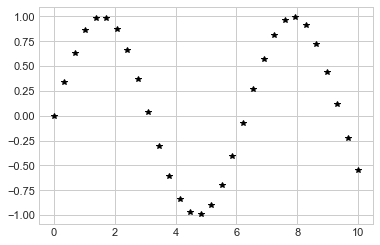

In [48]:
plt.plot(x,y,'*', color='black') 
# x데이터, y데이터, 마커, color='black' 

마커의 종류가 다양하다.
- 마커 종류표 사이트 링크 : 
    https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

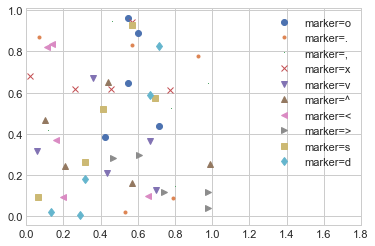

In [49]:
rng = np.random.RandomState(0)
for marker in ['o','.',',','x','v','^','<','>','s','d']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker=%s" % marker)
    plt.legend(numpoints=1) # numpoints 키워드는 범례의 마커 표시 갯 수
    plt.xlim(0, 1.8)

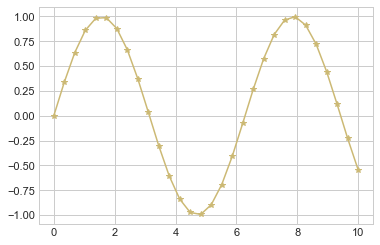

In [50]:
import matplotlib.pyplot as plt
plt.plot(x, y, '-*y') # 선스타일, 마커, 노랑

##### 마커를 꾸미는 키워드

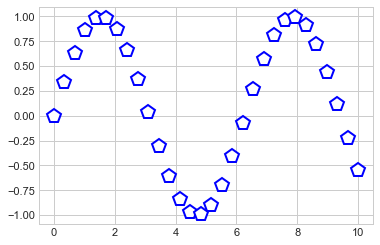

In [51]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x, y, 'p', color='gray',
        markersize = 15, # 마커의 크기
        linewidth = 4, # 선의 너비
        markerfacecolor = 'white', #마커 내의 색상
        markeredgecolor = 'blue', #마커의 외부색상
        markeredgewidth = 2) #마커 테두리의 너비

### plt.scatter를 활용한 산점도

plt.plot 함수와 비슷하게 사용할 수 있는 plt.scatter 함수가 있다

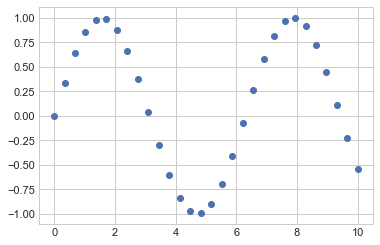

In [52]:
plt.scatter(x,y,marker='o')

plt.scatter는 plt.plot와 달리 각 점의 속성(크기, 표면 색상, 테두리, 색상 등)을 개별적으로 제어하거나 데이터에 매핑할 수 있다.

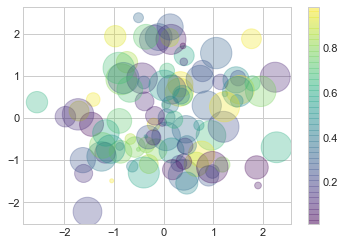

In [53]:

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100) # 평균이 0이고 표준편차가 1인 정규분포 값 100개
colors = rng.rand(100) # 0 ~ 1 사이 값 100개
sizes = 1000 * rng.rand(100)

plt.scatter(x,y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()

In [54]:
import pandas as pd
iris = pd.read_csv(r'iris.csv')

In [55]:
iris.head()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [56]:
pd.value_counts(iris['Species'])

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [57]:
def setColor(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    elif x == 'virginica':
        return 2
    else:
        return np.nan

In [58]:
iris['color'] = list(map(setColor,iris['Species']))

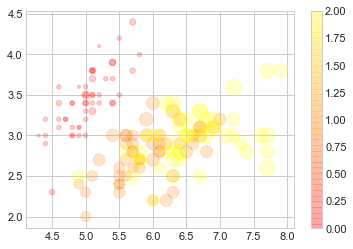

In [59]:
plt.scatter(iris['SepalLength'], iris['SepalWidth'],
           alpha=0.2, s=iris['PetalWidth']*100,
           c=iris['color'], cmap='autumn')
plt.colorbar()


##### Quiz) 
모바일 앱의 가격 대비 평점을 산점도로 표기하고 점의 크기로 지원하는 언어의 갯 수를 원의 크기, 색상은 3가지(상(2)중(1),하(0))로  나누어 표현해주세요
    - 가로 : 평점 (user_rating)
    - 세로 : 가격 (price)
    - 점크기 : 지원하는 언어(lang.num)
    - 색상 : 지원하는 언어를 크기에 따라 3가지로 구분


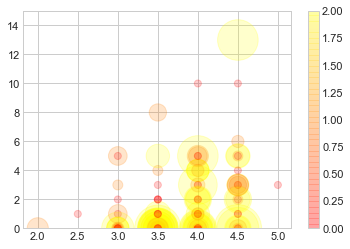

In [60]:
app = pd.read_csv('apple_store 2.csv')
app.head()
v = pd.qcut(app['lang.num'], 3, 
            labels=['0','1','2']).astype(int)

plt.scatter(app['user_rating'], app['price'],
           alpha=0.2, c = v,
           s=app['lang.num']*50, cmap='autumn')
plt.ylim(0,15)
plt.colorbar()

### 오차 시각화하기

#### 오차 막대


데이터의 결과의 시각화에서 오차를 효과적으로 보여주면 훨씬 더 완전한 정보를 전달 할 수 있다.

예시) 설문조사 오차, 천체물리 관측치

<ErrorbarContainer object of 3 artists>

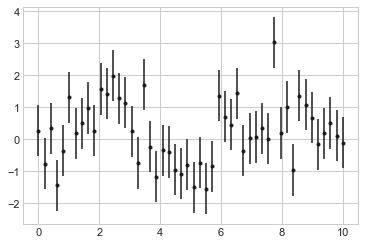

In [61]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

fmt은 선과 점의 모양을 제어하는 키워드로 라인과 산점도에서 활용했던 스타일과 색상의 약칭을 입력한다.


ecolor는 오류부분의 색상, elinewidth는 오류 부분의 너비 capsize는 오류 경계부분의 사이즈

<ErrorbarContainer object of 3 artists>

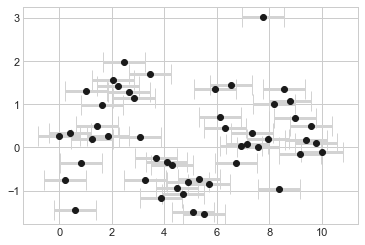

In [62]:
plt.errorbar(x, y, xerr=dy, fmt='o', color='k', 
             ecolor='lightgray', elinewidth=3, capsize=10)

<ErrorbarContainer object of 3 artists>

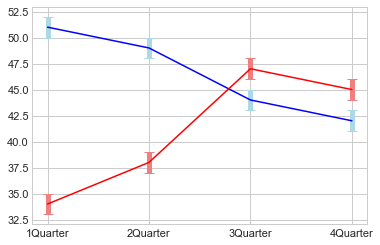

In [63]:
time = ['1Quarter','2Quarter','3Quarter','4Quarter']
clinton = [51, 49, 44, 42]
trump = [34, 38, 47, 45]
dy = 1
plt.errorbar(time, clinton, yerr=dy,
            color="blue", ecolor='lightblue',
            elinewidth=5, capsize=5)
plt.errorbar(time, trump,
             yerr = dy, color='red', ecolor='lightcoral',
             elinewidth=5, capsize=5)

### 밀도 플롯과 등고선 플롯

3차원 데이터를 등고선이나 색으로 구분한 영역을 사용해 2차원으로 표시하는 것이 유용하다. matplotlib은 이를 위한 3가지 함수(plt.contour, plot.contourf)를 지원한다

#### 3차원 함수 시각화 하기

In [64]:
x = np.linspace(0,5,40) # x좌표값
y = np.linspace(0,5,40) # y좌표값

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10+y*x) * np.cos(x)

In [65]:
X,Y = np.meshgrid(x,y) 
# 가로축 세로축을 이루는 점 좌표를 받아 사각형 영역을 이루는 조합 출력

In [66]:
#plt.scatter(X, Y, linewidths=10)

In [67]:
Z = f(X,Y)

plot.contour함수로 등고선 플롯을 만들어 보자

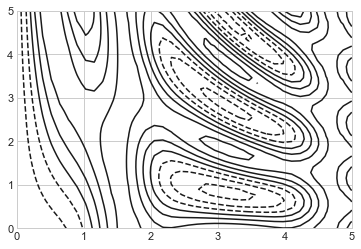

In [68]:
plt.contour(X,Y,Z, colors='k') # x, y는 좌표, z는 높이

x,y,z, 다음에 간격수 20을 입력하여 데이터의 범위를 나누었다. cmap 인수로 색상표를 지정해 선에 색을 입힐 수 있다.

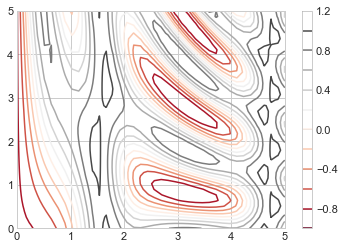

In [69]:
plt.contour(X,Y,Z,10,cmap='RdGy')
plt.colorbar()

plt.contourf()함수는 선 사이의 공간안에 색을 체워 등고선 플롯을 그릴 수 있다.

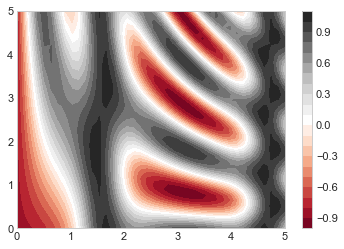

In [70]:
plt.contourf(X,Y,Z, 20, cmap='RdGy')
plt.colorbar()

### 히스토그램, 구간화

데이터세트의 데이터 분포를 알아보기 히스토그램이 많이 활용된다.

(array([  2.,  11.,  87., 203., 311., 241., 116.,  28.,   0.,   1.]),
 array([-3.70626976, -2.91722905, -2.12818834, -1.33914763, -0.55010692,
         0.23893379,  1.0279745 ,  1.81701521,  2.60605593,  3.39509664,
         4.18413735]),
 <a list of 10 Patch objects>)

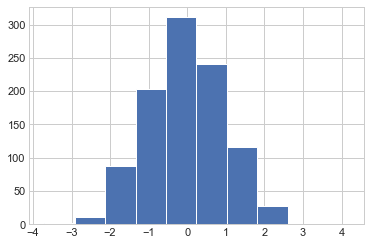

In [71]:
data = np.random.randn(1000) # 평균 0 편차가 1인 정규분포
plt.hist(data)


hist() 함수의 옵션들을 통해 그래프 표현을 조정할 수 있다.

- bins : 막대의 수(기본 10)
- alpha : 막대 색상의 투명도
- color : 막대 색상
- edgecolor : 막대의 테두리 색
- rwidth : 막대간 간격

(array([ 13., 290., 552., 144.,   1.]),
 array([-3.70626976, -2.12818834, -0.55010692,  1.0279745 ,  2.60605593,
         4.18413735]),
 <a list of 5 Patch objects>)

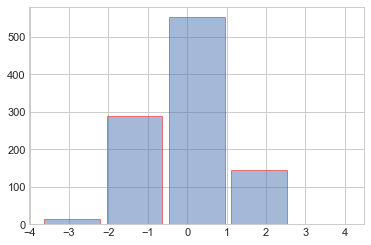

In [72]:
plt.hist(data, bins=5, alpha = 0.5, 
         edgecolor='red', rwidth=0.9)

(array([ 2.,  2.,  1.,  1.,  6.,  8.,  7.,  8.,  9., 18., 22., 14., 39.,
        37., 46., 45., 55., 42., 49., 50., 50., 61., 60., 58., 63., 63.,
        30., 41., 28., 20., 13.,  9., 11.,  7.,  7.,  3.,  3.,  7.,  2.,
         3.]),
 array([-2.92521739, -2.63369703, -2.34217667, -2.05065631, -1.75913595,
        -1.46761559, -1.17609523, -0.88457487, -0.59305451, -0.30153415,
        -0.01001379,  0.28150657,  0.57302693,  0.86454729,  1.15606765,
         1.44758801,  1.73910837,  2.03062873,  2.32214909,  2.61366945,
         2.90518981,  3.19671017,  3.48823053,  3.77975089,  4.07127125,
         4.36279161,  4.65431197,  4.94583233,  5.23735269,  5.52887305,
         5.82039341,  6.11191377,  6.40343413,  6.69495449,  6.98647485,
         7.27799521,  7.56951557,  7.86103593,  8.15255629,  8.44407665,
         8.73559701]),
 <a list of 40 Patch objects>)

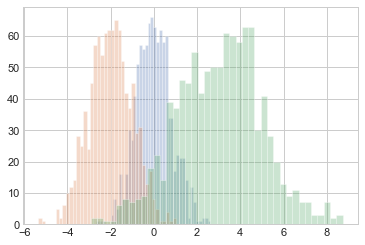

In [73]:
x1 = np.random.normal(0,0.8,1000) #평균 0, 표준편차 0.8인 숫자 1000개
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3, 2, 1000)
plt.hist(x1, bins=40, alpha = 0.3)
plt.hist(x2, bins=40, alpha = 0.3)
plt.hist(x3, bins=40, alpha = 0.3)

히스토그램 계산만 하고 표시만 한다면(구간에 해당하는 갯수만 샐 때) np.histogram() 함수를 활용

In [74]:
counts, bin_edges = np.histogram(data, bins=4)

In [75]:
counts

array([ 38, 576, 382,   4], dtype=int64)

##### Quiz)
앞의 퀴즈에서 진행한 모바일 앱 데이터프레임에서 앱의 카테고리(prime_genre)마다 구분하여 갯수를 표시하는 히스토그램을 그리자

In [76]:
app = pd.read_csv('apple_store 2.csv')
app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


- plt.figure(figsize=(12, 3)) # 플롯의 사이즈를 수정하는 figsize(너비, 높이) 키워드
- plt.xticks(rotation=90) # x축의 눈금값을 90도로 회전하는 rotation 키워드

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

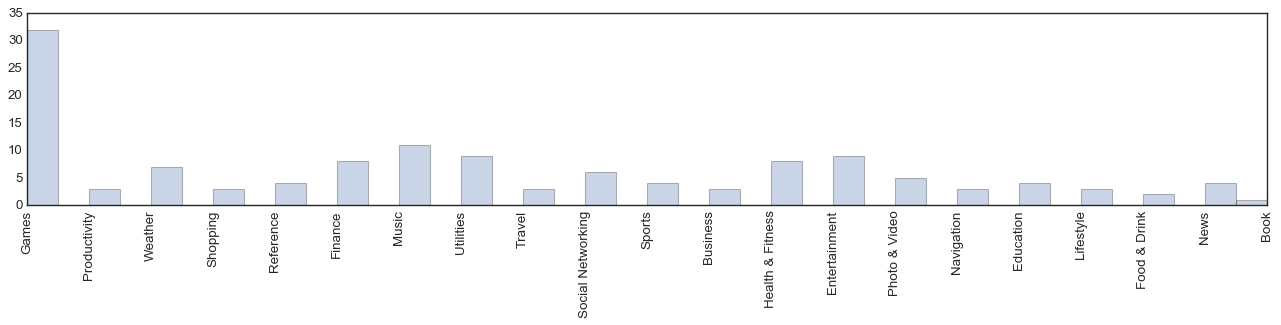

In [103]:
app = pd.read_csv('apple_store 2.csv')
app.head()
plt.style.use('seaborn-white')
plt.figure(figsize=(20, 3))
data = list(app['prime_genre'])
plt.hist(data, bins=40,  alpha = 0.3)
plt.xticks(rotation=90)

([<matplotlib.axis.XTick at 0x1c5c26a0>,
 <a list of 22 Text xticklabel objects>)

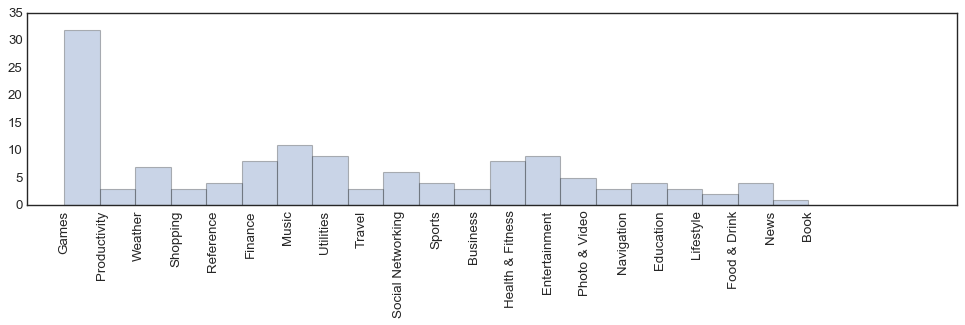

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

app = pd.read_csv('apple_store 2.csv')
app.head()

plt.style.use('seaborn-white')
plt
data= app['prime_genre']
# 문자열로된 장르를 숫자료 변환하기 위한 딕셔너리
match = { '':0,'Games':1, 'Productivity':2,
         'Weather':3, 'Shopping':4, 'Reference':5,
         'Finance':6, 'Music':7, 'Utilities':8,
         'Travel':9, 'Social Networking':10,
         'Sports':11, 'Business':12,
         'Health & Fitness':13, 'Entertainment':14,
         'Photo & Video':15, 'Navigation':16,
         'Education':17, 'Lifestyle':18,
         'Food & Drink':19, 'News':20, 'Book':21 }
# apply()함수를 활용하여 매치된 값으로 장르 값을 바꾼다.
data2 = app['prime_genre'].apply(lambda x:match[x])

# x축에 들어갈 장르 이름
labels = match.keys()

n = len(match)
# 장르 이름이 들어갈 위치(0~n)
pos = range(n)

plt.hist(data2, bins=21, alpha = 0.3)

# 장르 이름 위치, 장르이름, 90도 회전
plt.xticks(pos, labels, rotation=90)

### 플롯 범례 변경하기

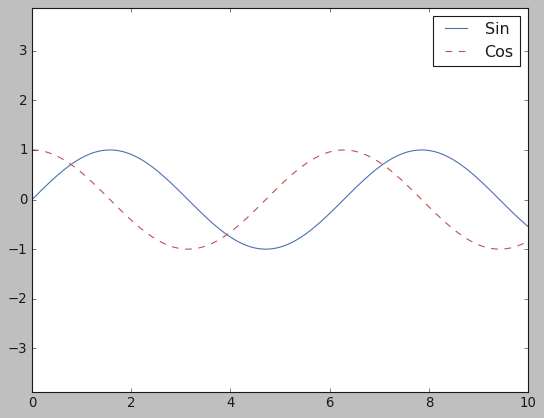

In [78]:

plt.style.use('classic')
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sin')
ax.plot(x, np.cos(x), '--r', label='Cos')
ax.axis('equal')
leg = ax.legend()

legend()함수의 loc 키워드로 범례의 위치를 frameon 키워드로 테두리를 지정할 수 있다.

loc='upper/lower left/right/center'

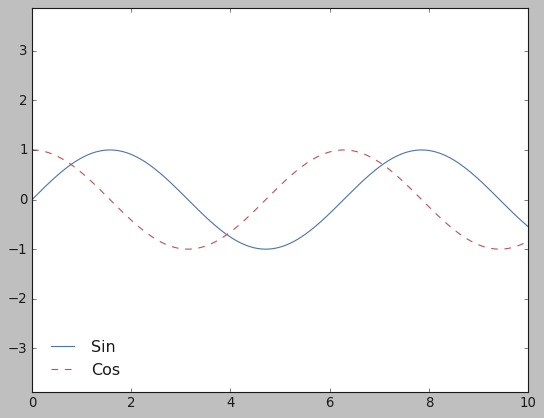

In [79]:
ax.legend(loc='lower left', frameon=False) # upper/lower left/right/center
fig

이외에 둥근 모서리박스 사용(fancybox), 투명도(framealpha), 음영(shadow), 박스내 여백(borderpad) 등을 변경할 수 있다.

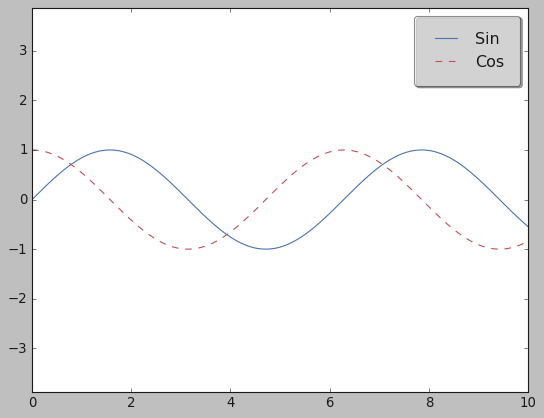

In [80]:
ax.legend(fancybox=True, framealpha=0.5, shadow=True, 
          borderpad=1)
fig

### 산점도에서 점 크기에 대한 범례

In [113]:
cities = pd.read_csv('./california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [114]:
lat, lon = cities['latd'], cities['longd']

In [118]:
population = cities['population_total']
area = cities['area_total_km2']
#plt.figure(figsize=(20, 3))

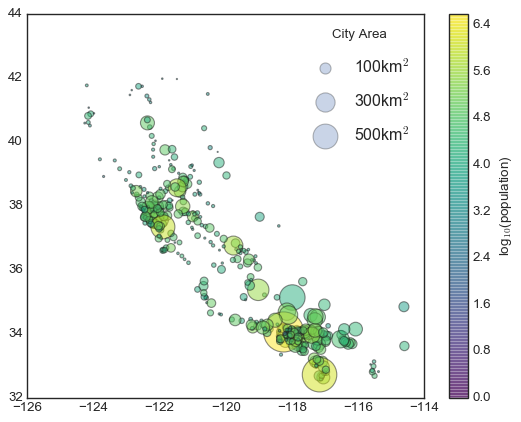

In [124]:
plt.scatter(lon,lat,c=np.log10(population),
           cmap='viridis', s=area, label=None, alpha=0.5)
plt.colorbar(label='log$_{10}$(population)') # $_{아래첨자}$

for area2 in [100, 300, 500]:
    plt.scatter([],[], alpha=0.3, s=area2,
               label=str(area2)+'km$^2$') # $^윗첨자$

plt.legend(scatterpoints=1, frameon=False, 
               labelspacing=1, title='City Area')

범례는 항상 플롯상의 객체를 참조하므로 특정 모양을 표시하려면 플로팅해야한다. 회색원은 플롯상에 없으므로 빈 리스트를 가지고 임시의 객체를 만들어 표시한다.

### 서브 플롯

자료를 비교할 때 서로 다른 데이터 뷰를 나란히 비교하는 것이 유용하다. Matplotlib에서는 서브플롯(subplot)이라는 개념이 있다.

plt.subplot(격자의 행, 격자의 열, 서브플롯의 인덱스)함수는 그리드(격자)안에 들어갈 여러 서브플롯을 생성한다.

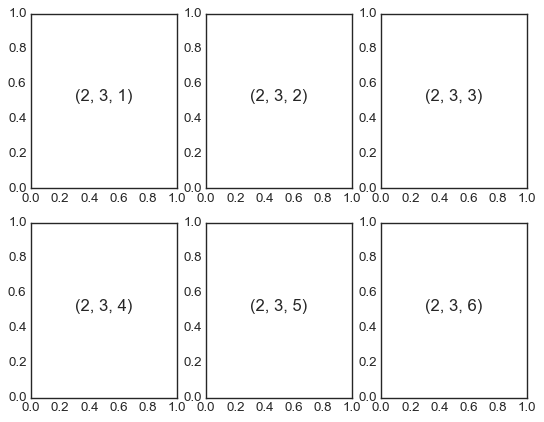

In [126]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5, str((2,3,i)), fontsize=15,
             ha='center')

plt.subplots_adjust()함수의 hspace, wspace로 플롯 간 높이, 너비 사이의 간격을 조정할 수 있다

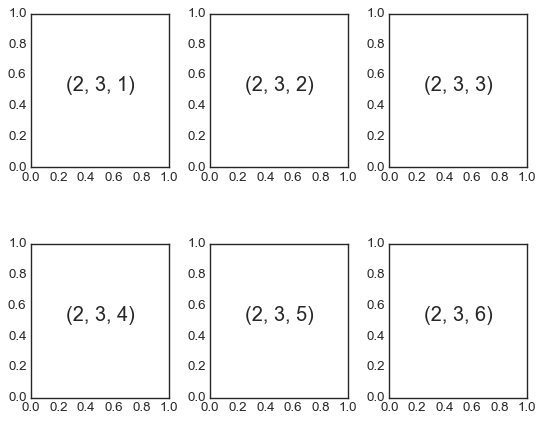

In [128]:
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str((2,3,i)),fontsize=18, ha='center')